# Pymaceuticals Inc.
---

### Analysis
- The bar charts indicate that there is more presence of mice in Capomiulin and Ramicane 

- The pie chart visual revelas that the mice are evenly distributed between male and female which helps ensure that there should not be bias based on gender. 

- The correlation at the end shows that there is a strong positive correlation of .84 meaning that as weight increases so does average tumor volume. One can draw conclusions that weight may be a facotr in understanding tumor growth in respponse to Capomulin Treatment
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
print(all_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [16]:
# Checking the number of mice.
total_mice = all_data["Mouse ID"].nunique()
print(total_mice)

249


In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = all_data[all_data.duplicated(subset=["Mouse ID","Timepoint"], keep = False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = all_data[all_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
print(duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data_cleaned = all_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = "first")
print(all_data_cleaned)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [26]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned = all_data_cleaned['Mouse ID'].nunique()
print(total_mice_cleaned)

249


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = all_data_cleaned.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_statistics = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

print(summary_statistics)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

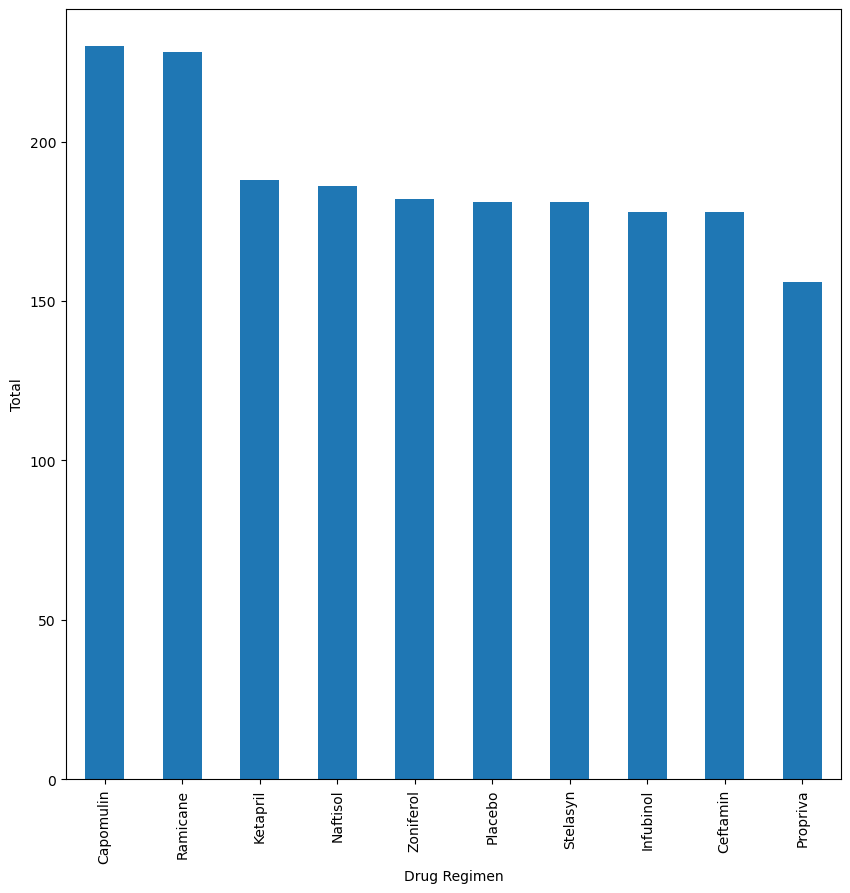

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = all_data_cleaned["Drug Regimen"].value_counts()

regimen_count.plot(kind="bar",figsize=(10,10))

plt.xlabel ("Drug Regimen")
plt.ylabel ("Total")
plt.show()

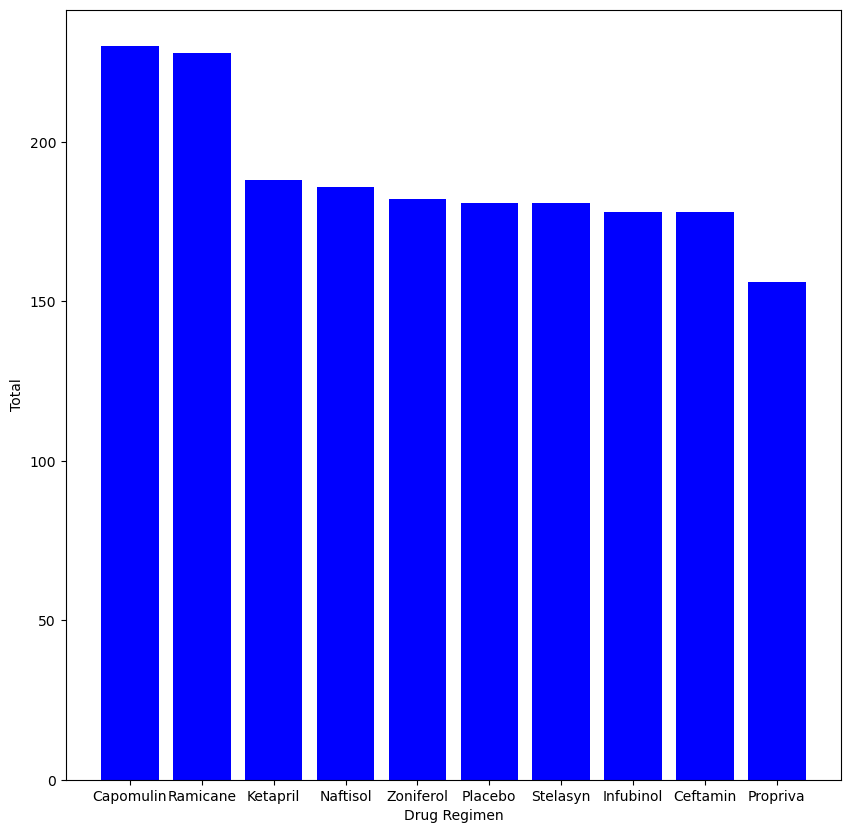

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count = all_data_cleaned["Drug Regimen"].value_counts()

regimens = regimen_count.index
counts = regimen_count.values

plt.figure(figsize=(10,10))
plt.bar(regimens,counts, color = "blue")

plt.xlabel ("Drug Regimen")
plt.ylabel ("Total")
plt.show()

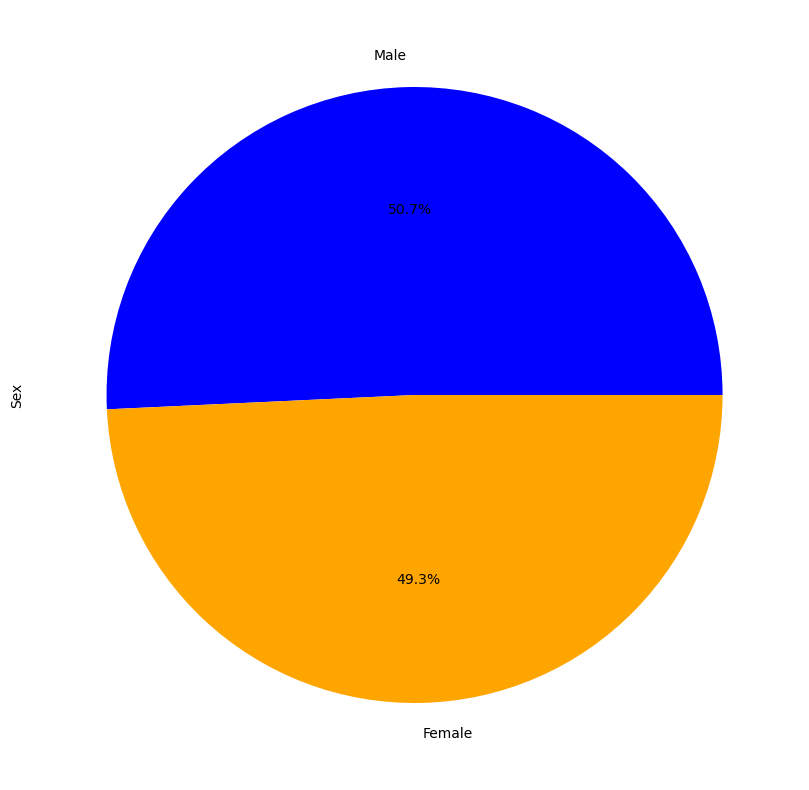

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = all_data_cleaned["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%", colors = ["blue", "orange"],figsize=(10,10))

plt.ylabel("Sex")

plt.show()

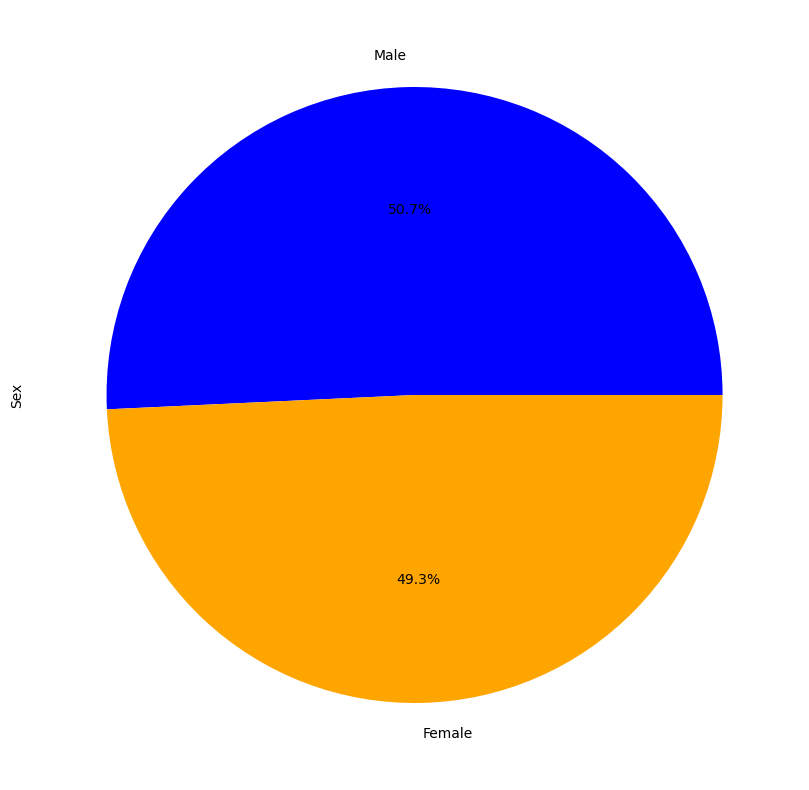

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = all_data_cleaned["Sex"].value_counts()

genders = gender_count.index
counts = gender_count.values

plt.figure(figsize=(10,10))
plt.pie(counts, labels = genders, autopct="%1.1f%%", colors = ["blue","orange"])


plt.ylabel ("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = all_data_cleaned.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume_df = pd.merge(last_timepoint_df, all_data_cleaned, on = ["Mouse ID", "Timepoint"], how="inner")

last_tumor_volume_df = last_tumor_volume_df[last_tumor_volume_df['Drug Regimen'].isin(treatment_regimens)]
print(last_tumor_volume_df)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [55]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = last_tumor_volume_df.loc[last_tumor_volume_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {potential_outliers}\n")

Regimen: Capomulin
IQR: 7.781863460000004
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Ramicane
IQR: 9.098536719999998
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Infubinol
IQR: 11.477135160000003
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Regimen: Ceftamin
IQR: 15.577752179999997
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



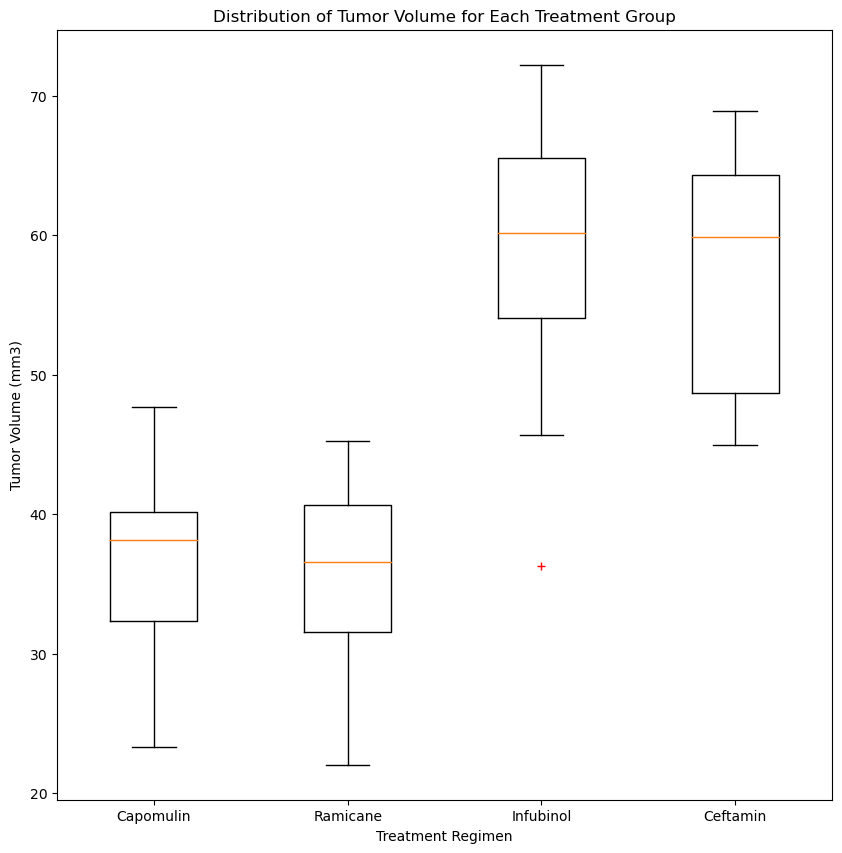

In [57]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in treatment_regimens]
plt.figure(figsize=(10, 10))
plt.boxplot(tumor_volume_data, labels=treatment_regimens, sym='r+')

plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for Mouse l509 (Capomulin Treatment)')

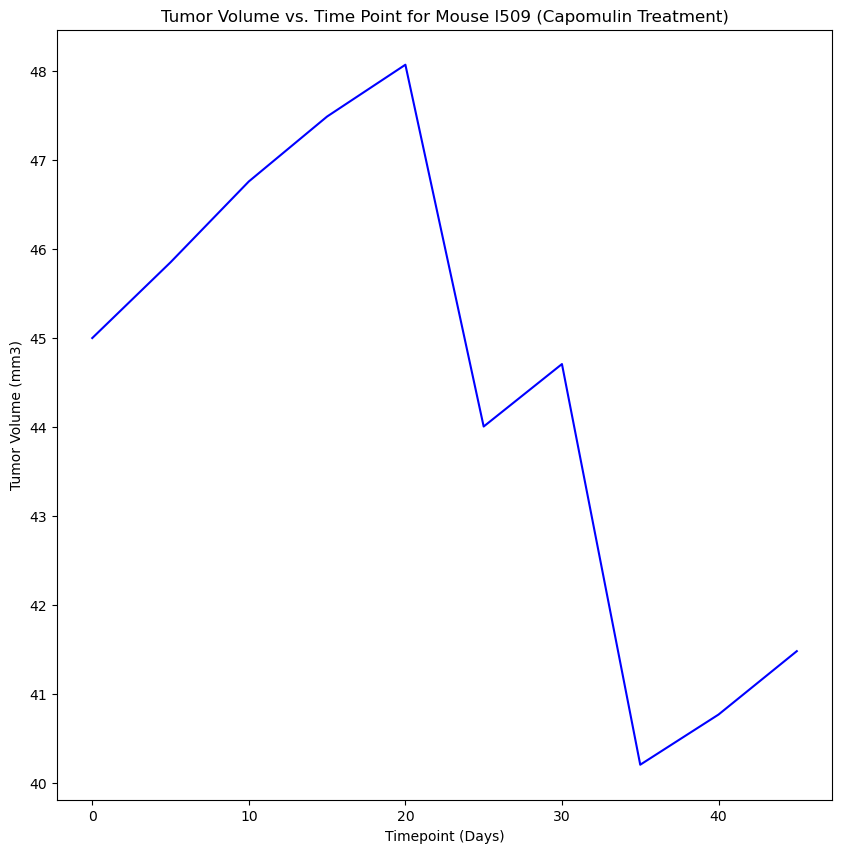

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = "l509"

single_mouse_data = all_data_cleaned[(all_data_cleaned["Mouse ID"]==single_mouse) & (all_data_cleaned["Drug Regimen"] == "Capomulin")]
plt.figure(figsize=(10, 10))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'],color='blue')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse} (Capomulin Treatment)')


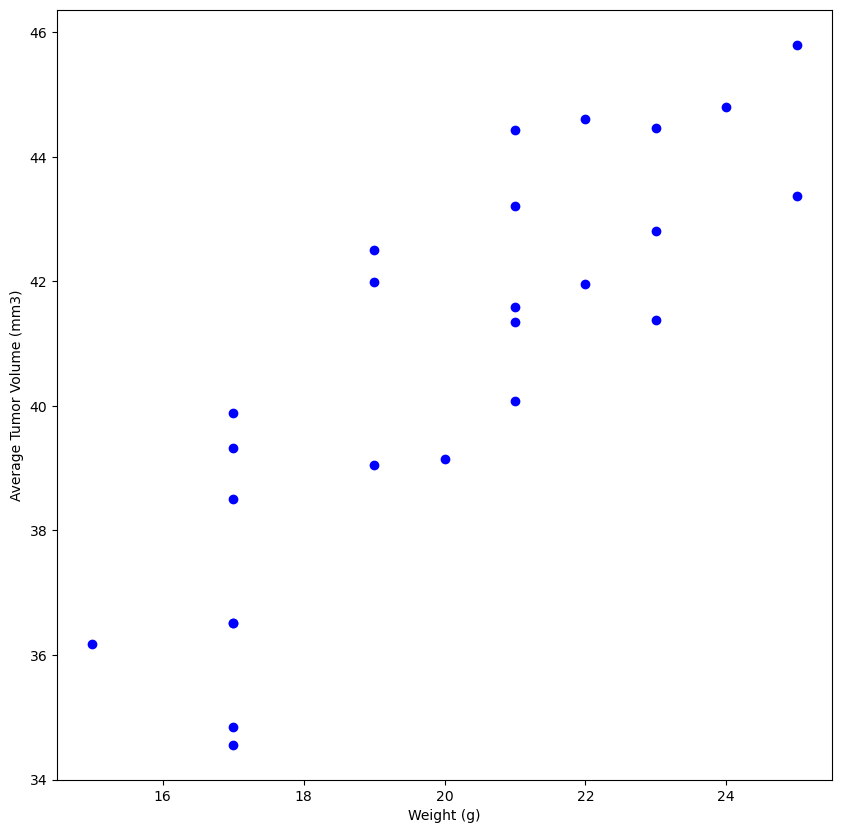

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = all_data_cleaned[all_data_cleaned['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 10))
plt.scatter(mouse_weights, average_tumor_volume, color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


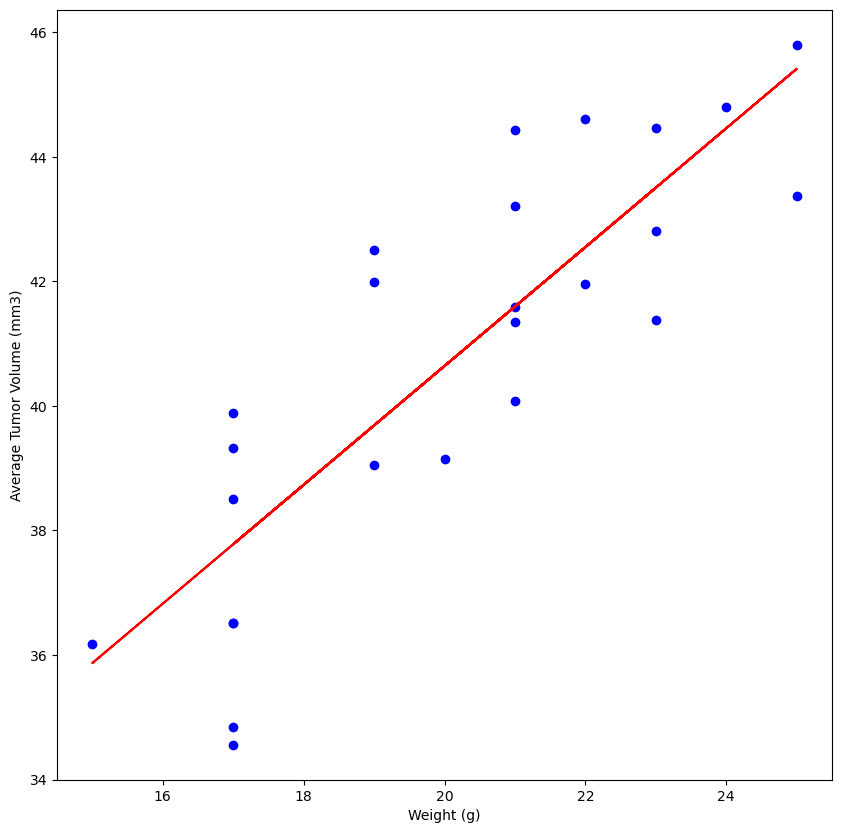

In [63]:
# Calculate the correlation coefficient and a linear regression model 
from scipy.stats import linregress
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = all_data_cleaned[all_data_cleaned['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = average_tumor_volume.corr(mouse_weights)
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)


plt.figure(figsize=(10, 10))
plt.scatter(mouse_weights, average_tumor_volume, color='blue')

plt.plot(mouse_weights, slope * mouse_weights + intercept, color='r')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
plt.show()